In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import techniques

In [2]:
boston_house = pd.read_csv("boston.csv")
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston_house.loc[:,column_sels]
y = boston_house['MEDV']
x = pd.DataFrame(data=scaler.fit_transform(x), columns=column_sels)

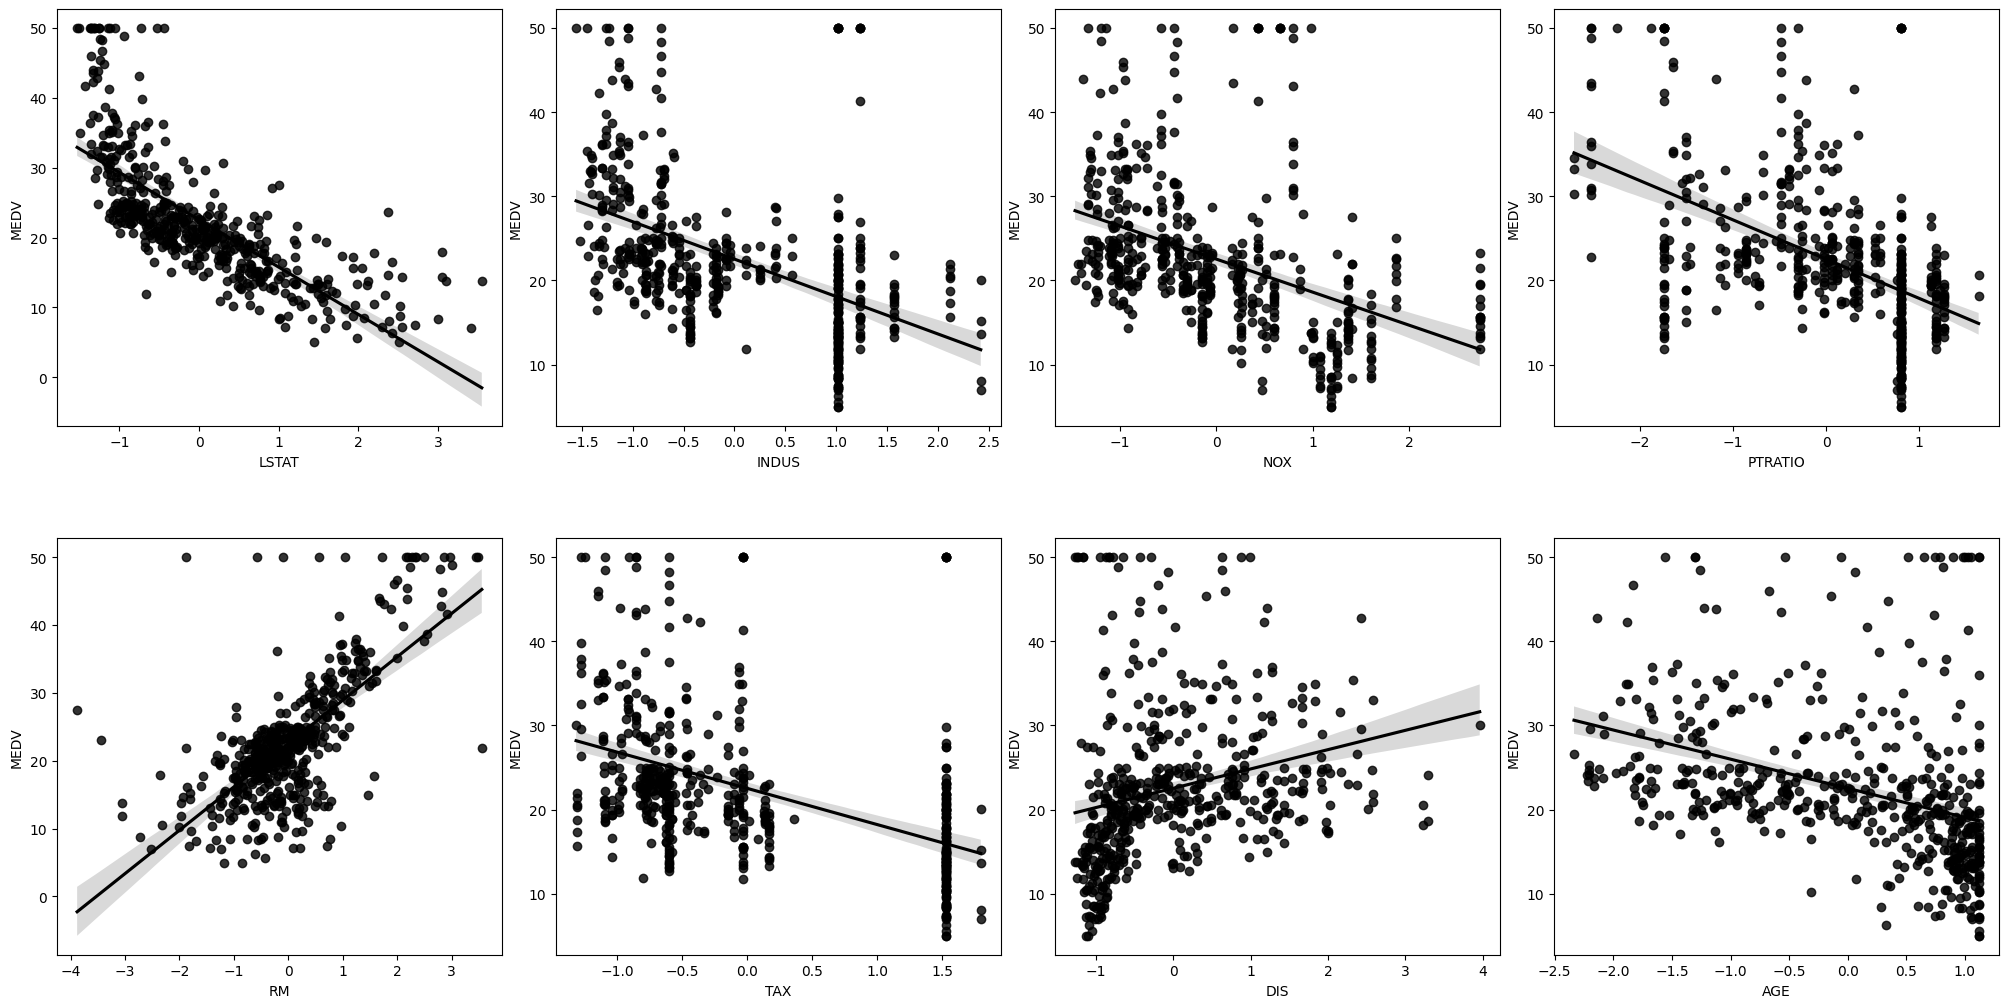

In [4]:
xfig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i], color = 'black')
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [5]:
p_n = 100
keep_val = np.arange(start = 0.7, stop = 0.99, step = 0.1)
best_keep, lowest_MSE, arr_ret = techniques.grid_searchCV_pruning(xin = np.array(x), yin = np.array(y), p = p_n, keep_rate = keep_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 5876.568167375417
The model parameters with lowest MSE is using keep_rate : 0.7999999999999999


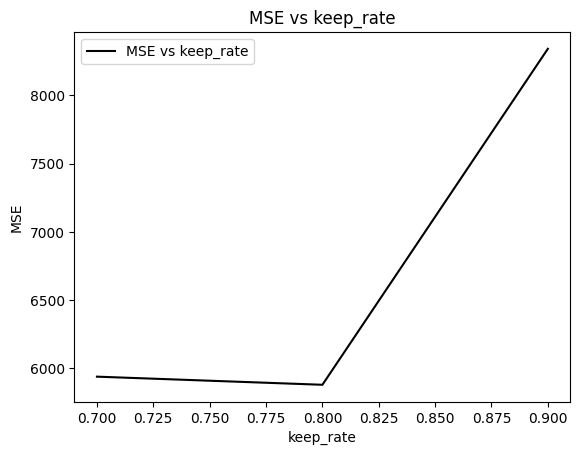

In [6]:
x_plot = np.arange(start = 0.7, stop = keep_val[keep_val.shape[0] -1] + 0.1, step = 0.1)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs keep_rate')
plt.title('MSE vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [7]:
ret = techniques.train_ELM_PRUNING(xin = np.array(x), yin = np.array(y), p = p_n, control = True, keep_rate = best_keep)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]
err_vec = ret[3]

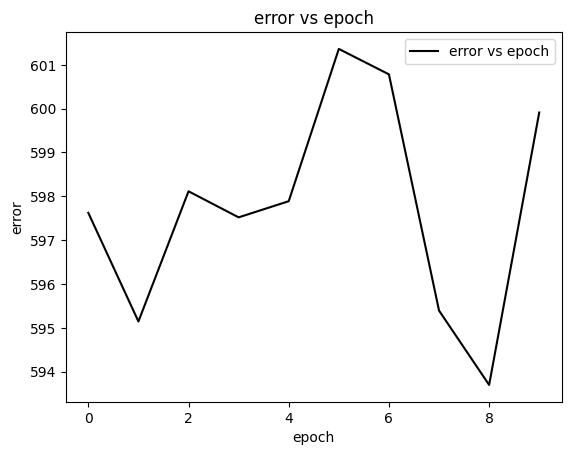

In [8]:
x_plot = np.arange(start = 0, stop = err_vec.shape[0], step = 1)
plt.plot(x_plot, err_vec, color = 'black', label = 'error vs epoch')
plt.title('error vs epoch')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), random_state = 0, train_size = 0.8)

In [10]:
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, control = True, classification = False).reshape(-1,)

In [11]:
np.array(y_test).shape, y_pred.shape

((102,), (102,))

In [12]:
print(f"{np.array(y_test)}")

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]


In [13]:
print(f"{y_pred}")

[ -3.24104243  -3.11727496  20.09670623  -7.01522375 -18.57352026
 -42.04446909  -1.65996845 -32.91982229  -7.73947086 -13.23590525
  -9.84030708 -10.70907254 -11.71254043  -7.53278342  41.89917299
   3.18606785  -1.3797655   10.97006687   2.20593876 -16.52059159
 -28.75694902  40.72220732 -13.11205225  -4.6479473   -5.69054987
   1.62309529 -20.780742    18.54425491  -1.17957588  16.26663337
  -8.00324102  -7.54142483 -30.24447004 -10.91334407  -0.61685328
  -7.20785064 -12.59375979  -2.20043242  -6.09200631  -9.99012174
  -1.23857234 -10.41090448  -8.00453663  -5.224178    -0.89644695
 -14.31807487  -5.62361669  15.4893403   14.28039517 -11.15938696
  18.5495991  -19.12244485  -9.49141612 -27.00096234  -8.10332726
   5.26232235  -7.06553979 -34.47282832  -2.70760698  -6.80055718
 -28.77956078 -14.69064588  -1.02282131  -1.32162315  -2.46516067
   4.87822132 -13.03870619  17.81495705 -10.84281269 -13.65524027
  -7.72807277 -21.71478384   2.37775009 -13.53750209  -1.78010295
  -9.06233